<a href="https://colab.research.google.com/github/YousraAshour/Unsupervised_machine_Learning/blob/main/Hierarchical_Clustering_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)
#percentage of null values

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Literacy percentage does not have proper data type          <br>
2- Climate field has very high null percentage          <br>
3- Count of population and area is ambiguous          <br>

In [6]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [7]:
#solution 
# replace commas in strings with points then cast it to float

In [8]:
#test 
df['Literacy (%)'] = df['Literacy (%)'].str.replace(',','.')
df['Literacy (%)'] = df['Literacy (%)'].astype(float, errors = 'raise')


In [9]:
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].str.replace(',','.')
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].astype(float, errors = 'raise')

In [10]:
df['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].str.replace(',','.')
df['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].astype(float, errors = 'raise')

In [11]:
df['Net migration'] = df['Net migration'].str.replace(',','.')
df['Net migration'] = df['Net migration'].astype(float, errors = 'raise')

In [12]:
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].str.replace(',','.')
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].astype(float, errors = 'raise')

In [13]:
fields = ['Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Deathrate','Agriculture','Industry','Service']

In [14]:
for i in fields:
  df[i] = df[i].str.replace(',','.')
  df[i] = df[i].astype(float, errors = 'raise')


In [15]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


**Second issue**

In [16]:
#solution 
#drop null values

In [17]:
#test 
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

In [19]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
df_scaled = df.drop(columns=['Country','Region'])
df_scaled=scaler.fit_transform(df_scaled)




## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

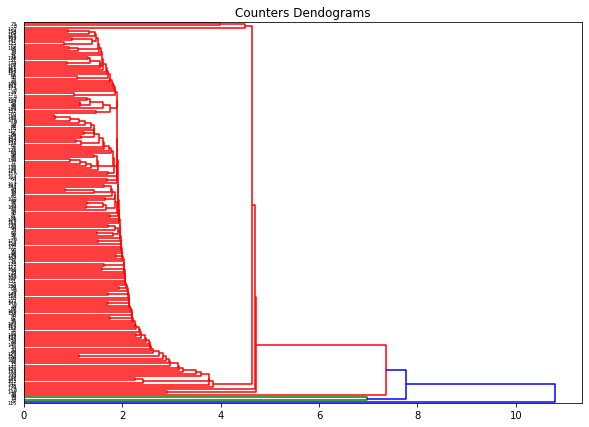

In [22]:
import scipy.cluster.hierarchy as shc
def llf(id):
    if id < n:
        return str(id)
    else:
        return '[%d %d %1.2f]' % (id, count, R[n-id,3])
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [23]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering = AgglomerativeClustering(n_clusters=4).fit(df_scaled)
clustering.labels_
silhouette_avg = silhouette_score(df_scaled, clustering.labels_)
print(silhouette_avg)


0.17635713090616523

0.5294268541324526


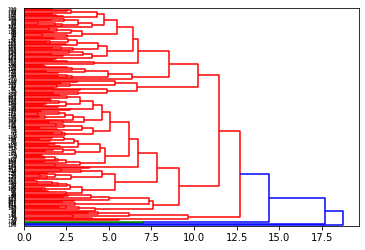

In [29]:
clustering2 = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(df_scaled)
clustering2.labels_
silhouette_avg2 = silhouette_score(df_scaled, clustering2.labels_)
print(silhouette_avg2)
dend = shc.dendrogram(shc.linkage(y=df_scaled , method='complete',metric='euclidean'),orientation='right')

0.5294268541324526


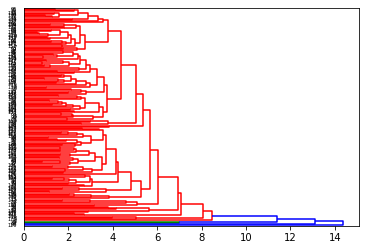

In [31]:
clustering3 = AgglomerativeClustering(n_clusters=4,linkage='average').fit(df_scaled)
clustering3.labels_
silhouette_avg3 = silhouette_score(df_scaled, clustering3.labels_)
print(silhouette_avg3)
dend = shc.dendrogram(shc.linkage(y=df_scaled , method='average',metric='euclidean'),orientation='right')

In [26]:
clustering4 = AgglomerativeClustering(n_clusters=4,linkage='single').fit(df_scaled)
clustering4.labels_
silhouette_avg4 = silhouette_score(df_scaled, clustering4.labels_)
silhouette_avg4
dend = shc.dendrogram(shc.linkage(y=df_scaled , method='single',metric='euclidean'),orientation='right')

0.5294268541324526

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [27]:
from sklearn.decomposition import PCA 


In [40]:
pca=PCA(n_components=8)
pca.fit(df_scaled)
pcaDF=pca.transform(df_scaled)

pcaDF

array([[ 5.08036604e+00, -2.41275809e+00,  2.42154588e-01, ...,
         1.94435005e+00, -2.39322519e-01, -2.89484223e+00],
       [-4.47696707e-01,  1.45786715e+00, -8.07121189e-03, ...,
        -5.96134364e-01, -4.49788425e-01,  1.41244766e+00],
       [ 8.61197935e-01, -1.96429896e+00,  8.59416113e-01, ...,
         8.96140663e-01, -4.83965764e-02, -2.16731281e-01],
       ...,
       [ 2.73911136e+00, -1.57038208e+00, -2.86847617e-01, ...,
         8.92631478e-01, -4.06172919e-01, -4.28514626e-01],
       [ 2.69924367e+00, -8.24472451e-01,  8.40860768e-04, ...,
        -7.04433979e-01,  7.61519641e-01,  1.25594158e-01],
       [ 1.58954232e+00, -6.38360935e-01, -1.16320639e-01, ...,
        -9.01532063e-01,  7.46468250e-01,  3.88648119e-01]])

0.5460393208374564


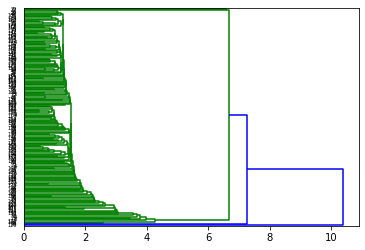

In [42]:
clustering5 = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(pcaDF)
clustering5.labels_
silhouette_avg5 = silhouette_score(pcaDF, clustering4.labels_)
print(silhouette_avg5)
dend = shc.dendrogram(shc.linkage(y=pcaDF , method='single',metric='euclidean'),orientation='right')